In [34]:
import re
import json
import pandas as pd
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

34.37452864599729


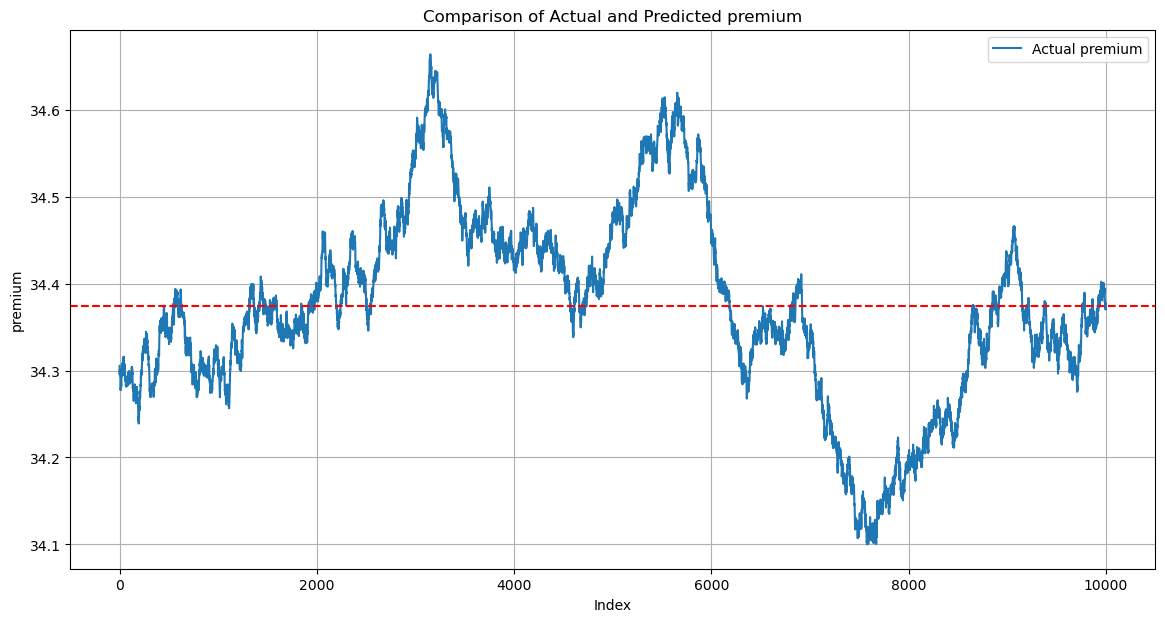

In [187]:
# Load the data from the uploaded CSV file
file_path = '../past_data/updated_combined_mid_prices_2.csv'
data = pd.read_csv(file_path)

# Retry adding the new column 'Gift_Basket_Premium'

data["Strawberries_Diff"] =  data['Strawberries_Mid_Price'] * 6 / data['Gift_Basket_Mid_Price'] * 100
print(data['Strawberries_Diff'].mean())
plt.figure(figsize=(14, 7))
plt.plot(data['Strawberries_Diff'], label='Actual premium', linewidth=1.5)
plt.axhline(data['Strawberries_Diff'].mean(), color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted premium')
plt.xlabel('Index')
plt.ylabel('premium')
plt.legend()
plt.grid(True)
plt.show()

44.585051427910116


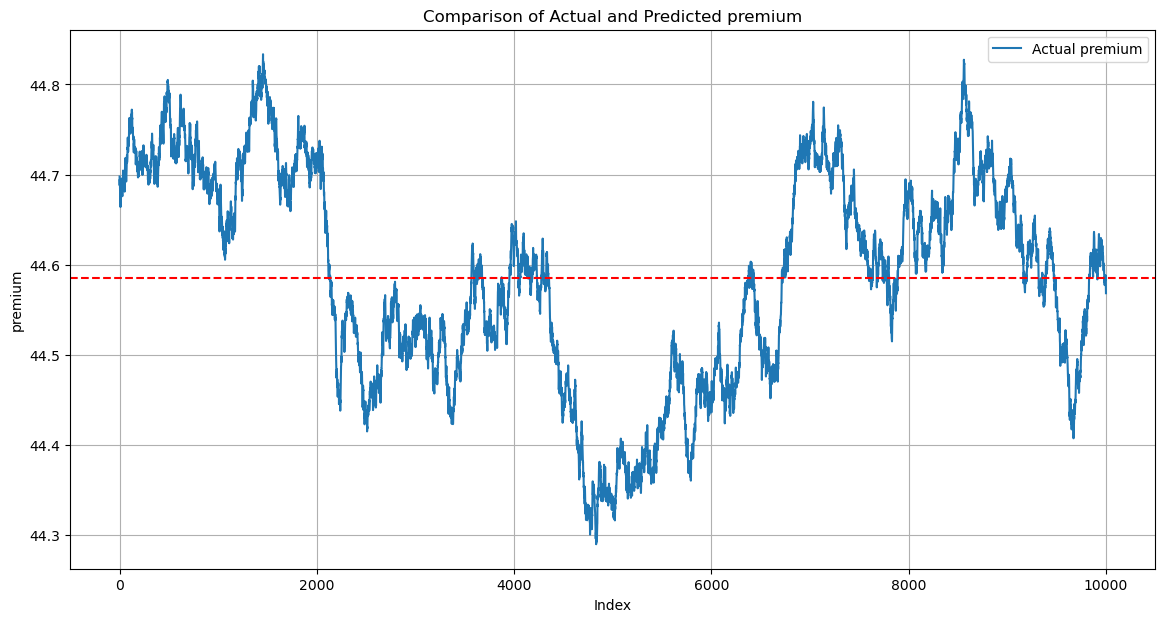

In [214]:
file_path = '../past_data/updated_combined_mid_prices_2.csv'
data = pd.read_csv(file_path)
# Retry adding the new column 'Gift_Basket_Premium'

data["Chocolate_Diff"] = data['Chocolate_Mid_Price'] * 4 /data['Gift_Basket_Mid_Price'] * 100
print(data['Chocolate_Diff'].mean())
plt.figure(figsize=(14, 7))
plt.plot(data['Chocolate_Diff'], label='Actual premium', linewidth=1.5)
plt.axhline(data['Chocolate_Diff'].mean(), color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted premium')
plt.xlabel('Index')
plt.ylabel('premium')
plt.legend()
plt.grid(True)
plt.show()

20.48707669193874


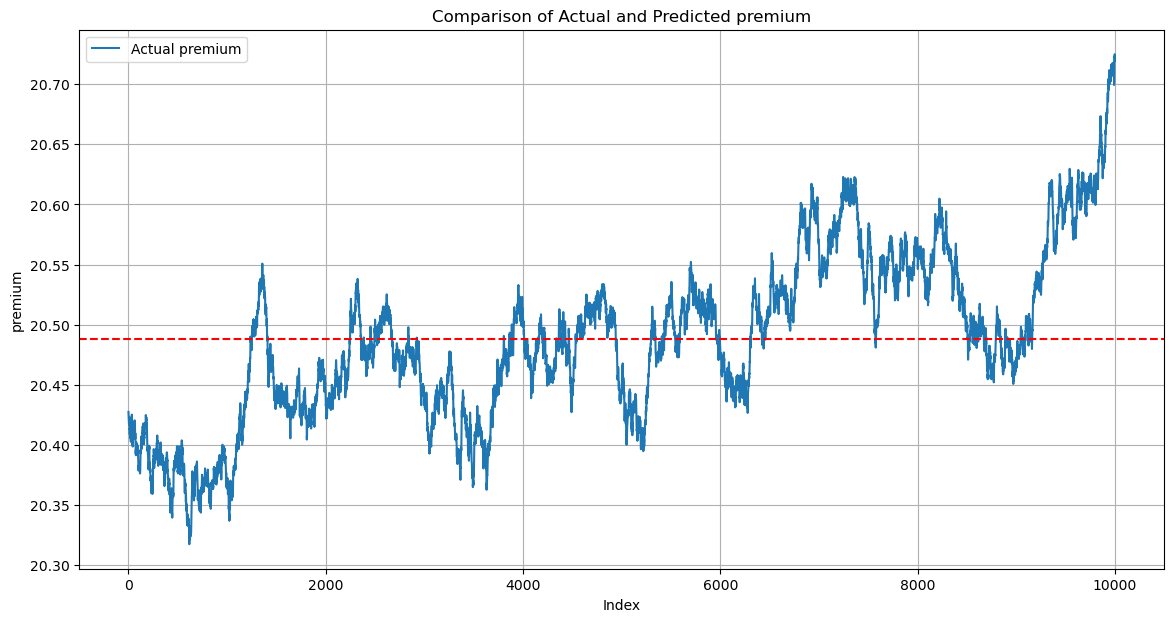

In [215]:
file_path = '../past_data/updated_combined_mid_prices_2.csv'
data = pd.read_csv(file_path)
# Retry adding the new column 'Gift_Basket_Premium'

data["Roses_Diff"] = data['Roses_Mid_Price'] /data['Gift_Basket_Mid_Price'] * 100
print(data['Roses_Diff'].median())
plt.figure(figsize=(14, 7))
plt.plot(data['Roses_Diff'], label='Actual premium', linewidth=1.5)
plt.axhline(data['Roses_Diff'].mean(), color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted premium')
plt.xlabel('Index')
plt.ylabel('premium')
plt.legend()
plt.grid(True)
plt.show()

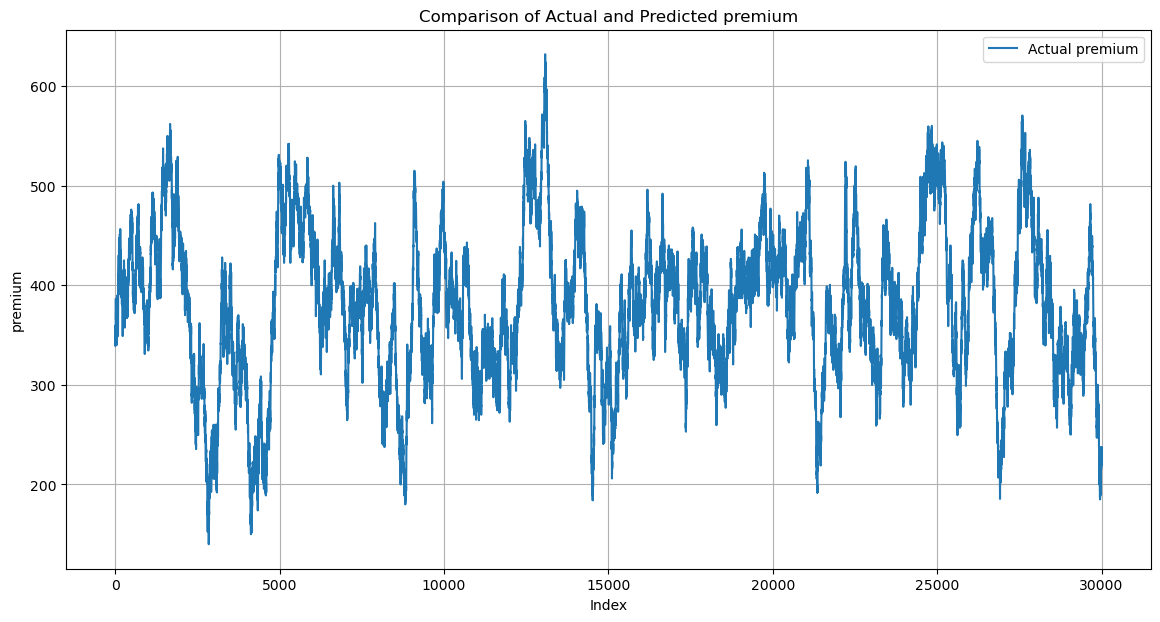

In [217]:
file_path = '../past_data/updated_combined_mid_prices.csv'
data = pd.read_csv(file_path)
# Constants
PREMIUM_LR_LENGTH = 25

# Preparing the time steps for linear regression
time_steps = np.arange(1, PREMIUM_LR_LENGTH + 1).reshape(-1, 1)
X_bias = np.hstack([np.ones((time_steps.shape[0], 1)), time_steps])

def predict_next_mid_price(past_trades):
    if len(past_trades) < PREMIUM_LR_LENGTH:
        return np.nan  # Not enough data to predict
    
    # Retrieve the last PREMIUM_LR_LENGTH mid_prices
    premiums = past_trades[-PREMIUM_LR_LENGTH:]
    
    # Calculating coefficients using the normal equation
    theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ premiums

    # Using the coefficients to predict the next mid_price
    next_time_step_with_bias = np.array([[1, PREMIUM_LR_LENGTH + 1]])
    predicted_premium = next_time_step_with_bias @ theta

    return predicted_premium.item()

# Applying the function to predict the next mid_price for each row
data['predicted_premium'] = data['Gift_Basket_Premium'].rolling(window=PREMIUM_LR_LENGTH).apply(predict_next_mid_price, raw=True)


data_part = data
# Show the updated data with the new column
import matplotlib.pyplot as plt

# Plotting mid_price and predicted_mid_price
plt.figure(figsize=(14, 7))
plt.plot(data_part['Gift_Basket_Premium'], label='Actual premium', linewidth=1.5)
#plt.plot(data_part['predicted_premium'], label='Predicted premium', linewidth=1.5, linestyle='--')
plt.title('Comparison of Actual and Predicted premium')
plt.xlabel('Index')
plt.ylabel('premium')
plt.legend()
plt.grid(True)
plt.show()

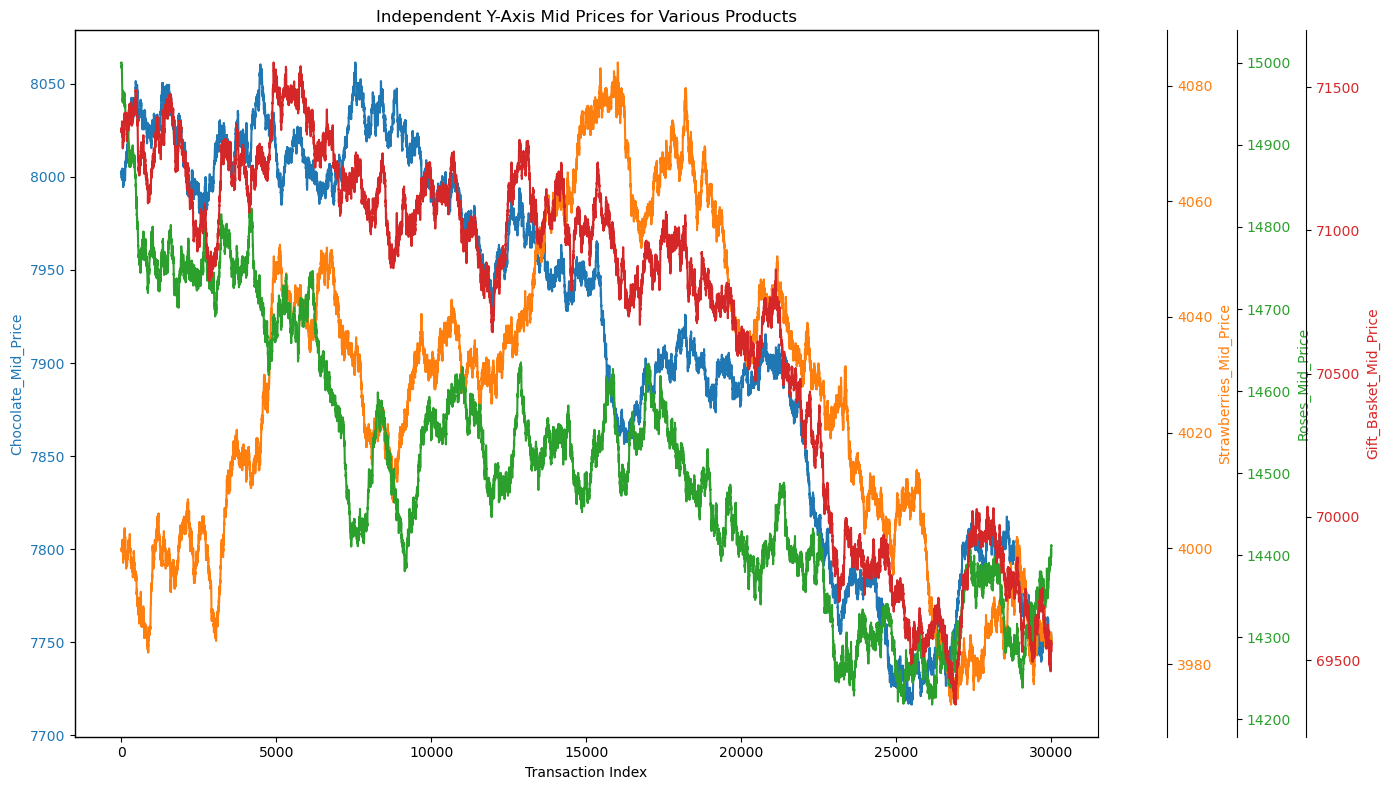

In [123]:
prices_df = pd.read_csv("../past_data/combined_mid_prices.csv")
part_prices_df = prices_df
# Adjusting the figure to better accommodate multiple y-axes without overlap
fig, ax1 = plt.subplots(figsize=(14, 8))

# Colors for each product line
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
products = part_prices_df.columns

# Create axes for each line plot
axes = [ax1]
for i in range(1, 4):
    # Creating additional axes with offset for better visibility
    new_ax = ax1.twinx()
    new_ax.spines['right'].set_position(('outward', 50 * i))  # Offset each additional y-axis to the right
    axes.append(new_ax)

# Plot each line on its respective axis
for i, product in enumerate(products):
    axes[i].plot(part_prices_df[product], color=colors[i], label=product)
    axes[i].set_ylabel(product, color=colors[i])
    axes[i].tick_params(axis='y', labelcolor=colors[i])

# Title and x-axis
ax1.set_title('Independent Y-Axis Mid Prices for Various Products')
ax1.set_xlabel('Transaction Index')

# Improving the layout
fig.tight_layout()  # Automatically adjust subplot params to give specified padding
plt.show()

In [32]:
# Load the CSV file to examine its structure
file_path = '../past_data/separate_by_products/gift_basket_prices_0.csv'
data = pd.read_csv(file_path)